In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/concat_data_2015_2024_filled.CSV")

df["DATA"] = pd.to_datetime(df["DATA"])
df = df.set_index("DATA")

df.head()


,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C)
DATA,,,,,,
2015-01-01,0.709091,831.636364,831.954545,831.454545,18.0,16.463636
2015-01-02,0.709091,831.636364,831.954545,831.454545,18.0,16.463636
2015-01-03,0.709091,831.636364,831.954545,831.454545,18.0,16.463636
2015-01-04,0.709091,831.636364,831.954545,831.454545,18.0,16.463636
2015-01-05,0.709091,831.636364,831.954545,831.454545,18.0,16.463636


In [3]:
df["TEMPERATURA"] = df[["TEMPERATURA MÁXIMA NA HORA ANT. (°C)", "TEMPERATURA MÍNIMA NA HORA ANT. (°C)"]].mean(axis=1)
df.head()

,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C),TEMPERATURA
DATA,,,,,,,
2015-01-01,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818
2015-01-02,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818
2015-01-03,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818
2015-01-04,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818
2015-01-05,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818


In [4]:
pd.set_option('display.float_format', '{:.5f}'.format)
df.describe()

,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C),TEMPERATURA
count,3653.00000,3653.00000,3653.00000,3653.00000,3653.00000,3653.00000,3653.00000
mean,0.24869,828.64461,828.84364,828.41483,15.28649,14.10856,14.69752
std,0.51634,2.82668,2.82327,2.85631,3.11821,2.88223,2.99393
min,0.00000,818.92727,819.08000,818.59000,2.32273,1.62273,1.97273
25%,0.00000,826.92083,827.12917,826.70833,13.33333,12.25417,12.74792
50%,0.02500,828.23750,828.41000,828.02083,15.09583,14.01250,14.56250
75%,0.20000,830.61667,830.82083,830.44167,17.62500,16.28333,16.93958
max,4.81667,840.73750,840.87917,840.61250,24.68889,22.83333,23.42083


In [5]:
df_weekly = df.resample("W").sum()

In [6]:
df_weekly.describe()

,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C),TEMPERATURA
count,523.00000,523.00000,523.00000,523.00000,523.00000,523.00000,523.00000
mean,1.73705,5787.83700,5789.22720,5786.23204,106.77161,98.54409,102.65785
std,2.37738,211.77704,211.81749,211.73208,19.14133,17.60620,18.34560
min,0.00000,1651.11667,1651.53333,1650.60833,32.06250,28.94583,30.50417
25%,0.21278,5788.83507,5790.41877,5787.17620,93.52036,86.45000,90.11141
50%,1.15231,5796.76667,5798.12917,5795.40833,104.47083,96.82083,100.47500
75%,2.53333,5811.96000,5813.44858,5810.67833,120.35223,112.03958,116.30397
max,25.90000,5868.38333,5869.62083,5867.12083,159.40000,147.97917,153.68958


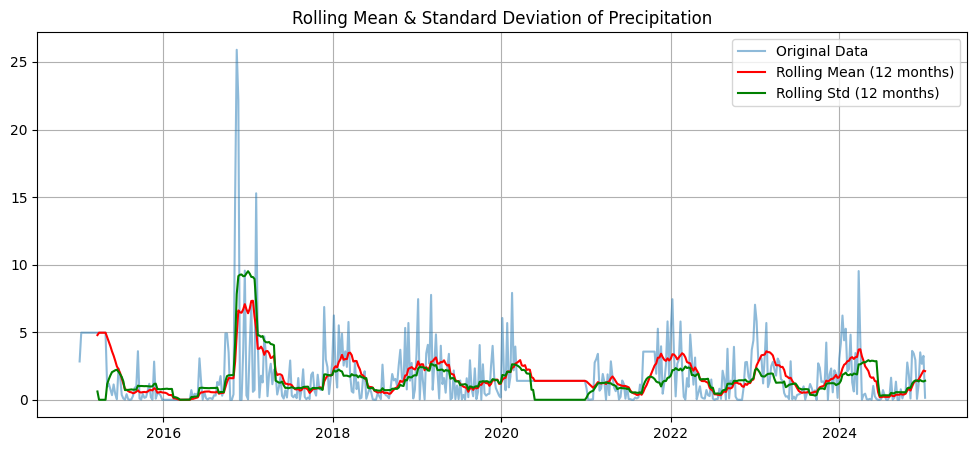

(-4.903016951272483,
 3.440584846089903e-05,
 {'1%': -3.4432372923913124,
  '5%': -2.86722383510113,
  '10%': -2.5697972702806613})

In [7]:
# check for stationarity

from statsmodels.tsa.stattools import adfuller

# Select the precipitation column
precip_col = "PRECIPITAÇÃO TOTAL HORÁRIO (mm)"
precip_data = df_weekly[precip_col]

# Perform ADF test
adf_result = adfuller(precip_data)

# Extract test results
adf_statistic, p_value, _, _, critical_values, _ = adf_result

# Plot rolling mean and standard deviation
plt.figure(figsize=(12, 5))
plt.plot(precip_data, label="Original Data", alpha=0.5)
plt.plot(precip_data.rolling(window=12).mean(), label="Rolling Mean (12 months)", color="red")
plt.plot(precip_data.rolling(window=12).std(), label="Rolling Std (12 months)", color="green")
plt.grid()
plt.legend()
plt.title("Rolling Mean & Standard Deviation of Precipitation")
plt.show()

# Return ADF test results
adf_statistic, p_value, critical_values

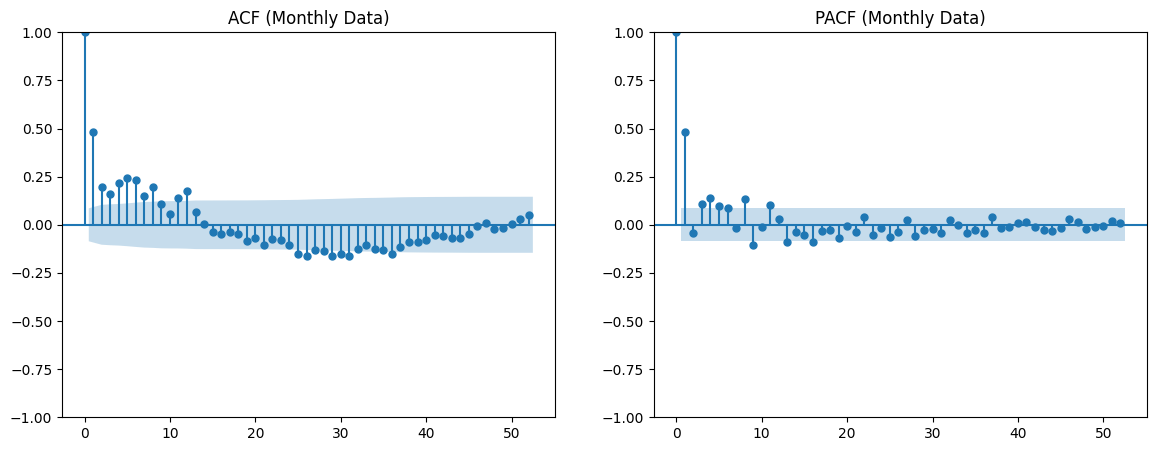

In [8]:
# Plot ACF and PACF for the monthly data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

num_of_lags = 52 # Up to 1 years of lags

plot_acf(precip_data, lags=num_of_lags, ax=axes[0])
axes[0].set_title("ACF (Monthly Data)")

plot_pacf(precip_data, lags=num_of_lags, ax=axes[1])
axes[1].set_title("PACF (Monthly Data)")

plt.show()


In [9]:
# Split data in train and test

features = ["PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)", "TEMPERATURA"]

endg_train = df_weekly["PRECIPITAÇÃO TOTAL HORÁRIO (mm)"][:"2022-12-31"]
endg_test = df_weekly["PRECIPITAÇÃO TOTAL HORÁRIO (mm)"]["2023-01-01":]

exog_train = df_weekly[features][:"2022-12-31"]
exog_test = df_weekly[features]["2023-01-01":]

In [10]:
from statsmodels.tsa.statespace import sarimax

# Define new SARIMA model for monthly data
monthly_model = sarimax.SARIMAX(
    endog=endg_train,
    exog=exog_train,
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
monthly_result = monthly_model.fit(disp=False)

# Display the model summary
monthly_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     PRECIPITAÇÃO TOTAL HORÁRIO (mm)   No. Observations:                  417
Model:               SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood                -901.204
Date:                             Tue, 04 Feb 2025   AIC                           1816.407
Time:                                     09:30:20   BIC                           1844.486
Sample:                                 01-04-2015   HQIC                          1827.518
                                      - 12-25-2022                                         
Covariance Type:                               opg                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)   6.26e-05      0.000      0.297      0.767      -0.000       0.000
TEMPERATURA                                              0.0125      0.011      1.128      0.259      -0.009       0.034
ar.L1                                                    0.3117      0.052      5.937      0.000       0.209       0.415
ma.L1                                                    0.1941      0.068      2.844      0.004       0.060       0.328
ar.S.L7                                                  0.3383      0.837      0.404      0.686      -1.303       1.980
ma.S.L7                                                 -0.3257      0.838     -0.389      0.698      -1.969       1.317
sigma2                                                   4.8377      0.188     25.766      0.000       4.470       5.206
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              5689.06
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             2.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

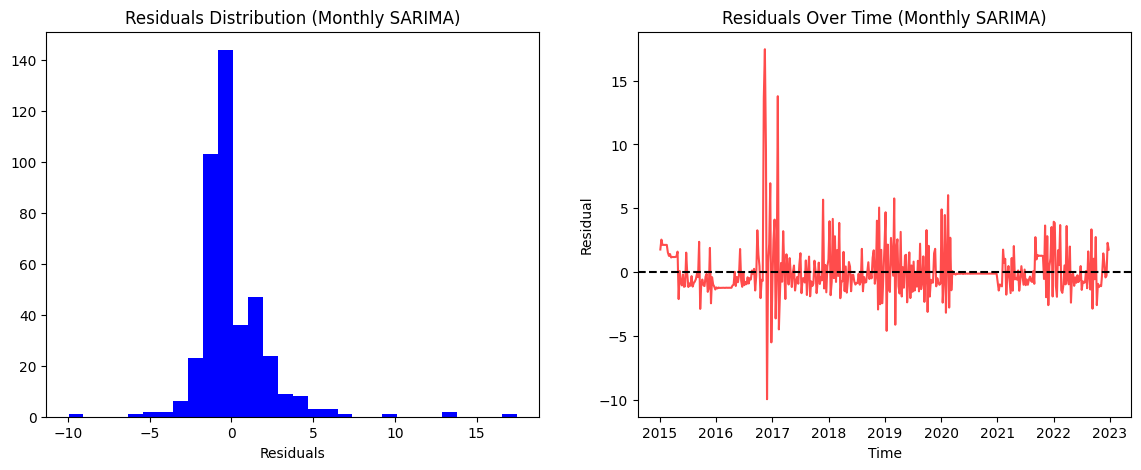

(0.06621244545991577, 2.1965943373286683)

In [11]:
import numpy as np

# Re-import seaborn for visualization
residuals_monthly = monthly_result.resid

# Re-run residual analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of residuals
axes[0].hist(residuals_monthly, bins=30, color='blue')
axes[0].set_title("Residuals Distribution (Monthly SARIMA)")
axes[0].set_xlabel("Residuals")

# Residuals over time
axes[1].plot(residuals_monthly, color='red', alpha=0.7)
axes[1].axhline(0, linestyle="--", color="black")
axes[1].set_title("Residuals Over Time (Monthly SARIMA)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Residual")

plt.show()

# Check residuals mean and standard deviation
residuals_mean_monthly = np.mean(residuals_monthly)
residuals_std_monthly = np.std(residuals_monthly)

residuals_mean_monthly, residuals_std_monthly
